# EDA
 - before covid and lockdown

In [1]:
from google.colab import drive
drive.mount("/content/drive/")
%cd "drive/My Drive/"


Mounted at /content/drive/
/content/drive/My Drive


In [6]:
%cd "twitter_data_food_quantity"

/content/drive/.shortcut-targets-by-id/1L9_g5eG75GYICVKt3zWeiKeDbqXPwoTg/twitter_data_food_quantity


In [7]:
!ls

johannesburg  kenya  legos


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

In [9]:
def to_date(datas):
    for data in datas:
        data.created_at = data.created_at.dt.strftime('%Y-%m-%d')
        data.created_at = pd.to_datetime(data.created_at)

In [10]:
def glance(datas):
    for data in datas :
  
        names =[x for x in globals() if globals()[x] is data]
        name = names[0]
        if len(names) > 3:
            name = names[1]

    
        print("++++++++++++++++++shape of the  {} data:+++++++++++++++++++++ ".format(name))
        print(data.shape)
        print("\n unique no of each variable\n")
        print(data.nunique())
        print("\n--------data summery------------\n")
        print(data.info())
        data.sample(10)    


In [11]:
def univariate(datas):
    for data in datas:
        names =[x for x in globals() if globals()[x] is data]
        name = names[0]
        if len(names) > 3:
            name = names[1]
        print("++++++++++++++++++{} data:+++++++++++++++++++++ ".format(name))

        cat_col = data.select_dtypes(exclude=['int64', 'float64']).columns #catagorical columns
        non_cat_col = data.select_dtypes(include=['int64', 'float64']).columns # non catagorical variable
        for  var in non_cat_col:
            g = sns.FacetGrid(data)
            g.map(sns.distplot, var,hist=True,kde=False)
        plt.show()
        print(cat_col)

In [12]:
def at_whole_time(datas):
    for data in datas:
        names =[x for x in globals() if globals()[x] is data]
        name = names[0]
        if len(names) > 3:
            name = names[1]
        print("++++++++++++++++++{} data:+++++++++++++++++++++ ".format(name))
    #     data.index = pd.to_datetime(data['created_at'].loc[3],format='%y-%m-%d %H:%M:%S')
        data.groupby(data.created_at).sum().plot()
        time.sleep(20)
        plt.show()

In [13]:
# pd.concat([after_covid_kenya,before_covid_kenya]).groupby("created_at").sum().plot()

In [14]:
def covid_analysis(data_before_covid,data_after_covid):
    data_before_covid =data_before_covid.groupby(data_before_covid.created_at).sum()
    data_after_covid =data_after_covid.groupby(data_after_covid.created_at).sum()

    sns.lineplot( x = data_before_covid.index , y = data_before_covid.id)
    sns.lineplot( x = data_after_covid.index , y = data_after_covid.id)


    plt.ylabel("count tweet")
    plt.legend(["before covid","after covid"])

In [15]:
def lockdown_analysis(data_before_ld,data_during_ld,data_after_ld,):
    data_before_ld =data_before_ld.groupby(data_before_ld.created_at).sum()
    data_after_ld=data_after_ld.groupby(data_after_ld.created_at).sum()
    data_during_ld=data_during_ld.groupby(data_during_ld.created_at).sum()

    sns.lineplot( x = data_before_ld.index , y = data_before_ld.id)
    sns.lineplot( x = data_during_ld.index , y = data_during_ld.id)
    sns.lineplot( x = data_after_ld.index , y = data_after_ld.id)


    plt.ylabel("count tweet")
    plt.legend(["before lock down","during lock down","after lock down"])

In [16]:

def lockdown_period(data_before_ld,data_during_ld,data_after_ld):
    data_before_ld =data_before_ld.groupby(data_before_ld.created_at.dt.month).sum()
    data_after_ld=data_after_ld.groupby(data_after_ld.created_at.dt.month).sum()
    data_during_ld=data_during_ld.groupby(data_during_ld.created_at.dt.month).sum()

    sns.lineplot( x = data_before_ld.index , y = data_before_ld.id)
    sns.lineplot( x = data_during_ld.index , y = data_during_ld.id)
    sns.lineplot( x = data_after_ld.index , y = data_after_ld.id)


    plt.ylabel("count tweet")
    plt.legend(["before lock down","during lock down","after lock down"])

In [17]:
def favorite_count(before_ld,during_ld,after_ld):
    sns.lineplot(x = before_ld["created_at"] , y = before_ld.favorite_count)
    sns.lineplot(x = during_ld["created_at"] , y = during_ld.favorite_count )
    sns.lineplot(x = after_ld["created_at"] , y = after_ld.favorite_count)

    plt.ylabel("count favorite")
    plt.legend(["before covid","after covid"])

In [18]:
def retweet_count(before_ld,during_ld,after_ld):
    sns.lineplot(x = before_ld["created_at"] , y = before_ld.retweet_count)
    sns.lineplot(x = during_ld["created_at"] , y = during_ld.retweet_count )
    sns.lineplot(x = after_ld["created_at"] , y = after_ld.retweet_count)

    plt.ylabel("count retweet")
    plt.legend(["before covid","after covid"])

In [19]:
def count_plot(datas):
    all_tweet = {}
    for data in datas:
        names =[x for x in globals() if globals()[x] is data]
        name = names[0]
        if len(names) > 3:
             name = names[1]
        all_tweet.update( {name : len(data)} )
    all_tweets = pd.DataFrame.from_dict(all_tweet, orient='index',columns=[ 'value' ])
    all_tweets = all_tweets.sort_values('value',ascending=False).reset_index()
    plt.figure(figsize=(10,8))
    ax = sns.barplot(x="index", y="value", hue="index", data=all_tweets)

    ax.set(xlabel="period", ylabel='Count')
    for i, v in enumerate(all_tweets["value"].iteritems()):        
        ax.text(i ,v[1], "{:,}".format(v[1]), color='m', rotation=30)


    

## Kenya

In [20]:
# after_covid_kenya = pd.read_csv("/Untitled Folder 2/after_covid_kenya.csv",parse_dates=['created_at'])
after_lockdown_Nairobi = pd.read_csv("kenya/data_after_lockdown_N.csv",parse_dates=['created_at'])
# before_covid_kenya = pd.read_csv("before_covid_kenya.csv",parse_dates=['created_at'])
before_lockdown_Nairobi = pd.read_csv("kenya/data_before_lockdown_N.csv",parse_dates=['created_at'])
during_lockdown_Nairobi = pd.read_csv("kenya/data_during_lockdown_N.csv",parse_dates=['created_at'])

In [21]:
from matplotlib  import rcParams

%matplotlib inline
rcParams["figure.figsize"] = 16,6
c = '#386B7F'

In [22]:
datas = [before_lockdown_Nairobi,during_lockdown_Nairobi,after_lockdown_Nairobi]


In [23]:
to_date(datas)

In [24]:
glance(datas)

++++++++++++++++++shape of the  before_lockdown_Nairobi data:+++++++++++++++++++++ 
(100, 9)

 unique no of each variable

Unnamed: 0        100
Unnamed: 0.1      100
Unnamed: 0.1.1     95
id                100
created_at         30
screen_name        44
retweet_count      40
favorite_count      9
text               97
dtype: int64

--------data summery------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      100 non-null    int64         
 1   Unnamed: 0.1    100 non-null    int64         
 2   Unnamed: 0.1.1  100 non-null    int64         
 3   id              100 non-null    float64       
 4   created_at      100 non-null    datetime64[ns]
 5   screen_name     100 non-null    object        
 6   retweet_count   100 non-null    float64       
 7   favorite_count  100 non-null    float64       
 8   tex

### Univariate Analysis

++++++++++++++++++before_lockdown_Nairobi data:+++++++++++++++++++++ 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


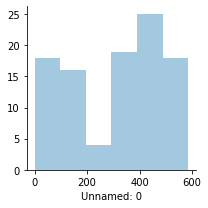

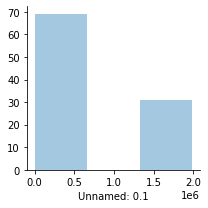

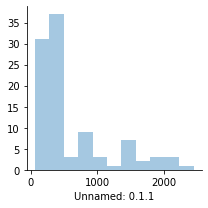

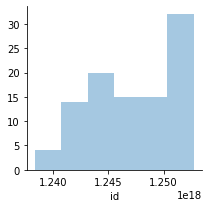

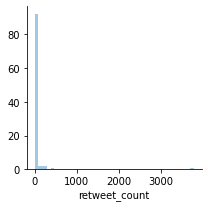

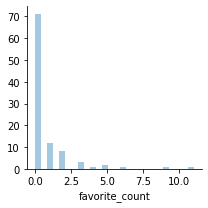

Index(['created_at', 'screen_name', 'text'], dtype='object')
++++++++++++++++++during_lockdown_Nairobi data:+++++++++++++++++++++ 


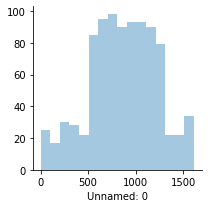

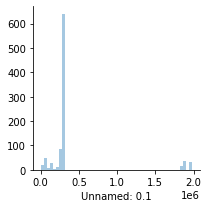

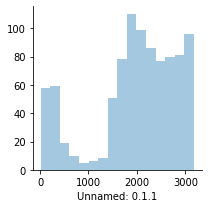

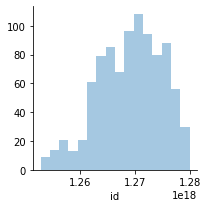

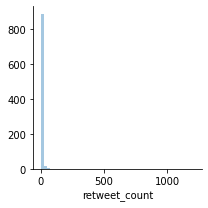

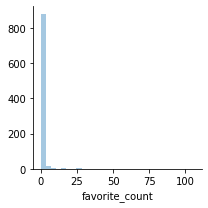

Index(['created_at', 'screen_name', 'text'], dtype='object')
++++++++++++++++++after_lockdown_Nairobi data:+++++++++++++++++++++ 


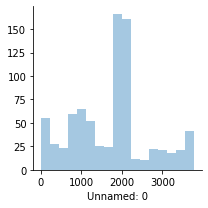

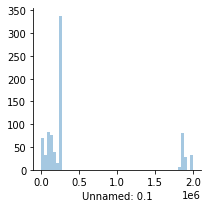

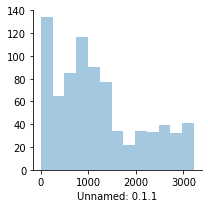

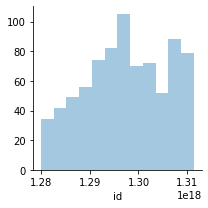

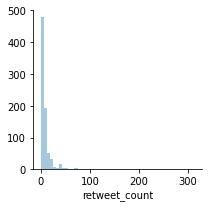

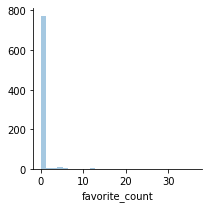

Index(['created_at', 'screen_name', 'text'], dtype='object')


In [25]:
univariate(datas)

### Seasonal Analysis

++++++++++++++++++before_lockdown_Nairobi data:+++++++++++++++++++++ 


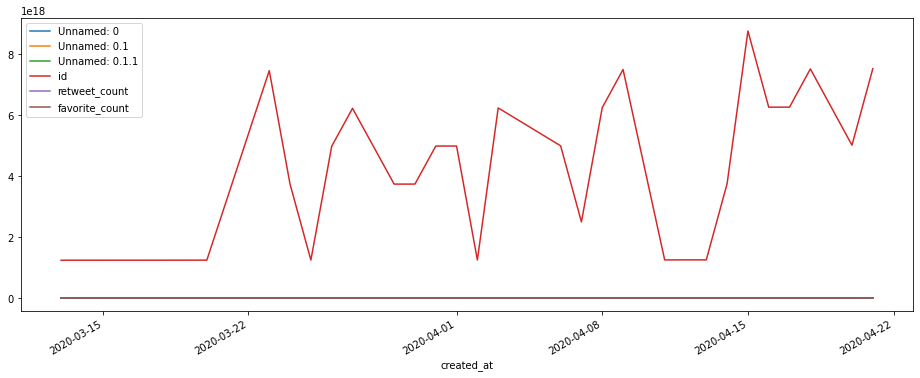

++++++++++++++++++during_lockdown_Nairobi data:+++++++++++++++++++++ 


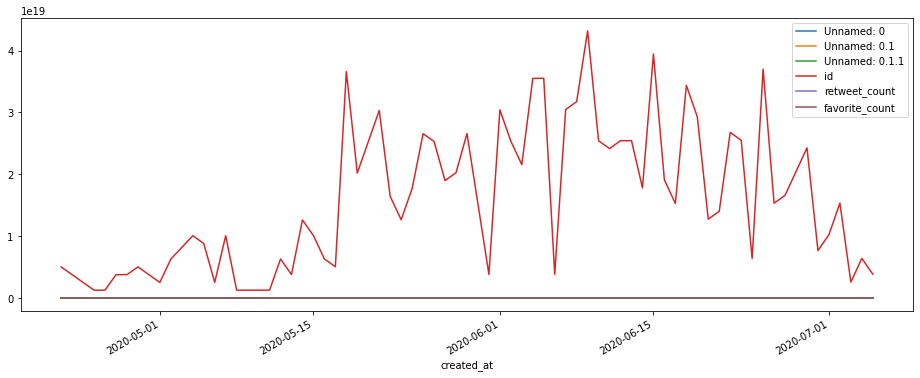

++++++++++++++++++after_lockdown_Nairobi data:+++++++++++++++++++++ 


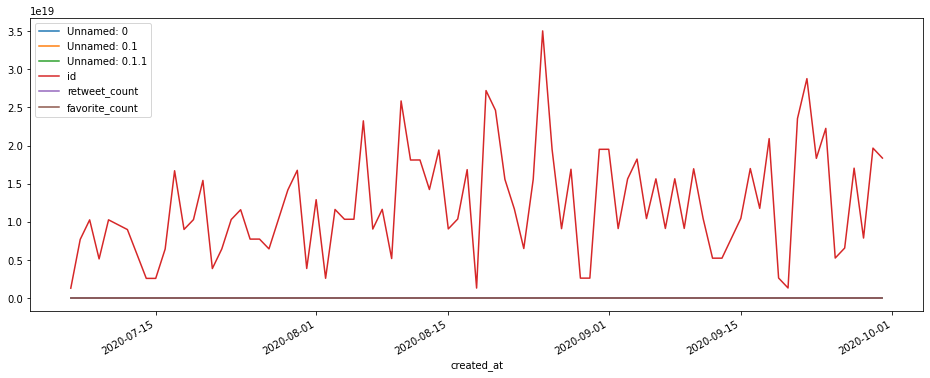

In [26]:
at_whole_time(datas)

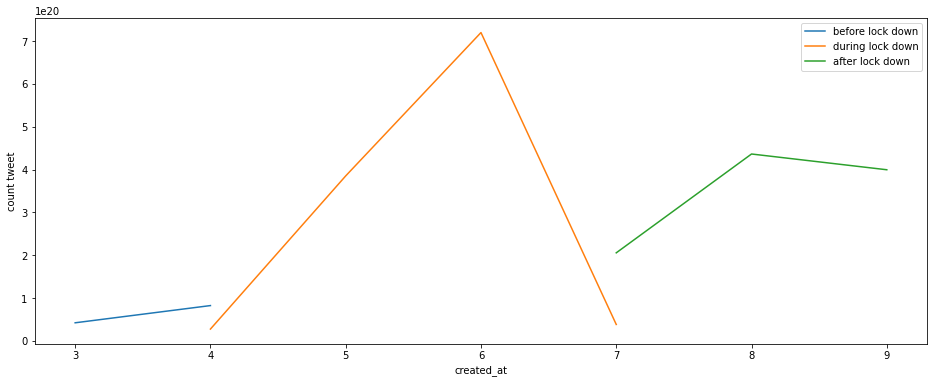

In [30]:
lockdown_period(before_lockdown_Nairobi,during_lockdown_Nairobi,after_lockdown_Nairobi)

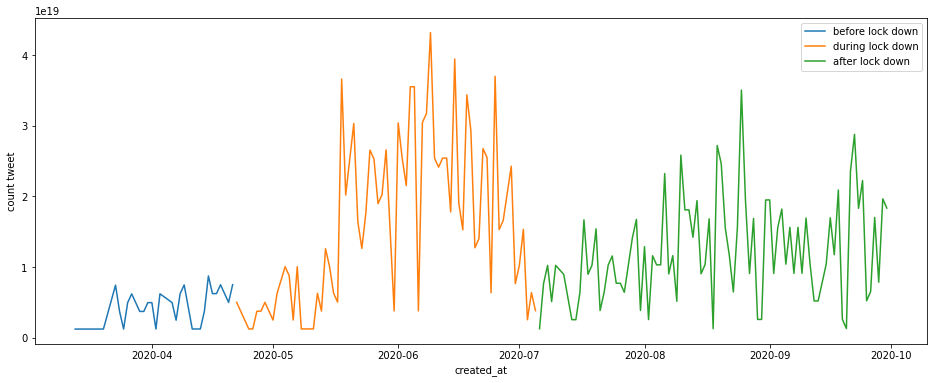

In [31]:
lockdown_analysis(before_lockdown_Nairobi,during_lockdown_Nairobi,after_lockdown_Nairobi)

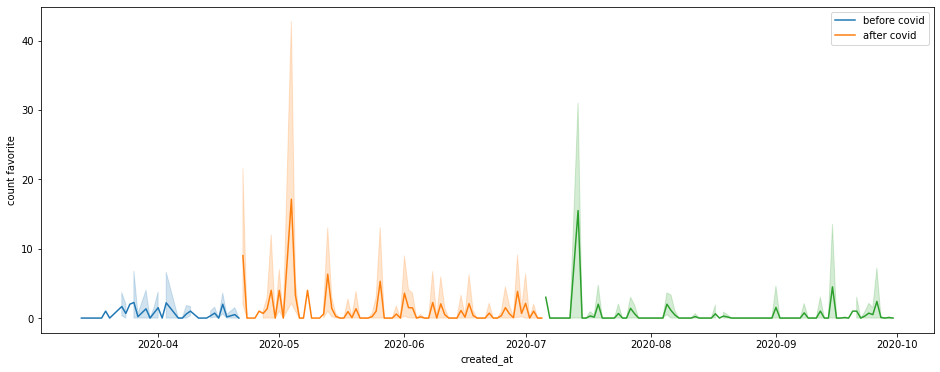

In [32]:
favorite_count(before_lockdown_Nairobi,during_lockdown_Nairobi,after_lockdown_Nairobi)


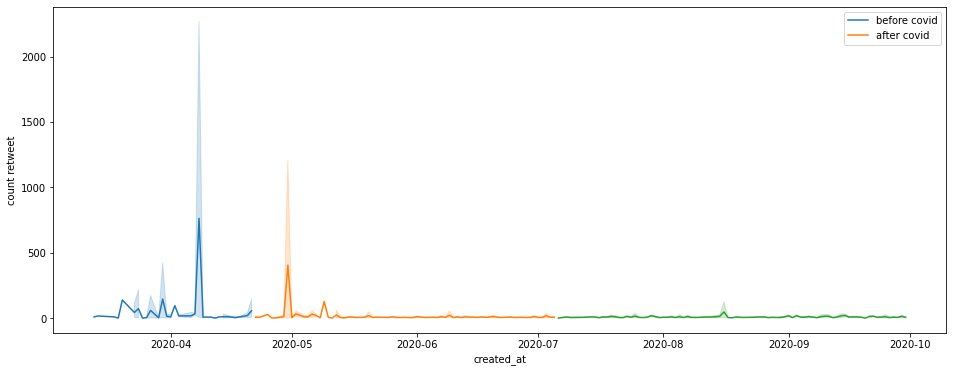

In [33]:
retweet_count(before_lockdown_Nairobi,during_lockdown_Nairobi,after_lockdown_Nairobi)


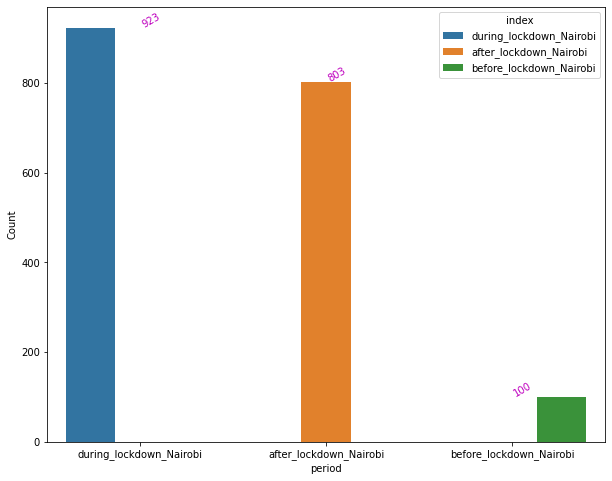

In [34]:

count_plot(datas)


# Johannesburg

In [35]:
after_ld_Johannesburg = pd.read_csv("johannesburg/data_after_lockdown_J.csv",parse_dates=['created_at'])
before_ld_Johannesburg = pd.read_csv("johannesburg/data_before_lockdown_J.csv",parse_dates=['created_at'])
during_ld_Johannesburg = pd.read_csv("johannesburg/data_during_lockdown_J.csv",parse_dates=['created_at'])

In [36]:
datas = [before_ld_Johannesburg,during_ld_Johannesburg,after_ld_Johannesburg]

In [37]:
to_date(datas)

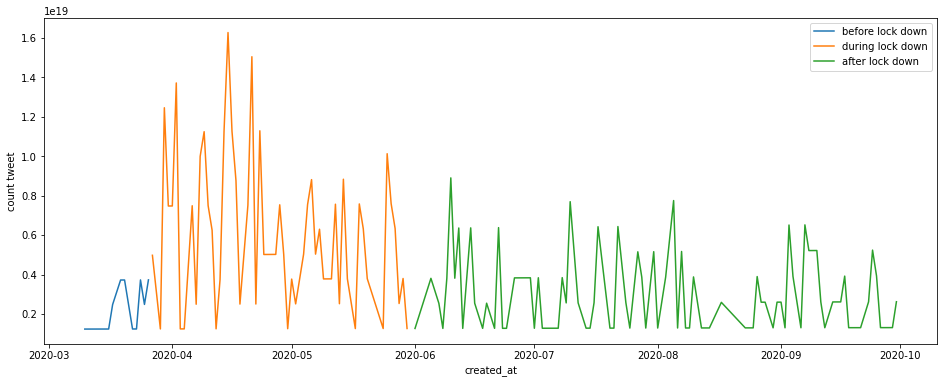

In [39]:
lockdown_analysis(before_ld_Johannesburg,during_ld_Johannesburg,after_ld_Johannesburg)

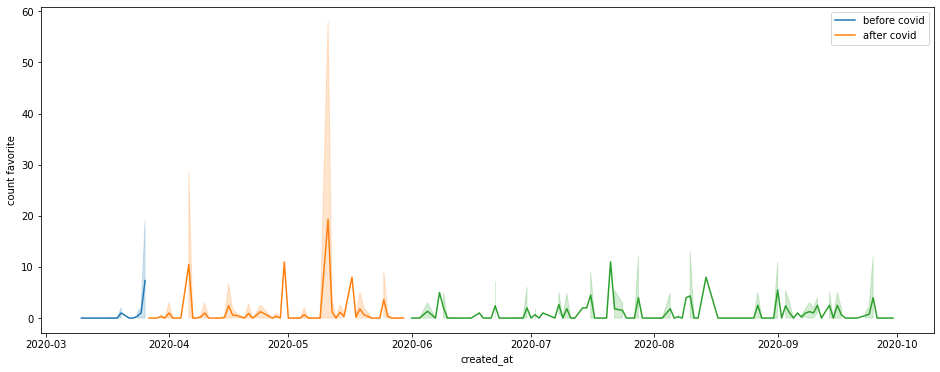

In [40]:
favorite_count(before_ld_Johannesburg,during_ld_Johannesburg,after_ld_Johannesburg)


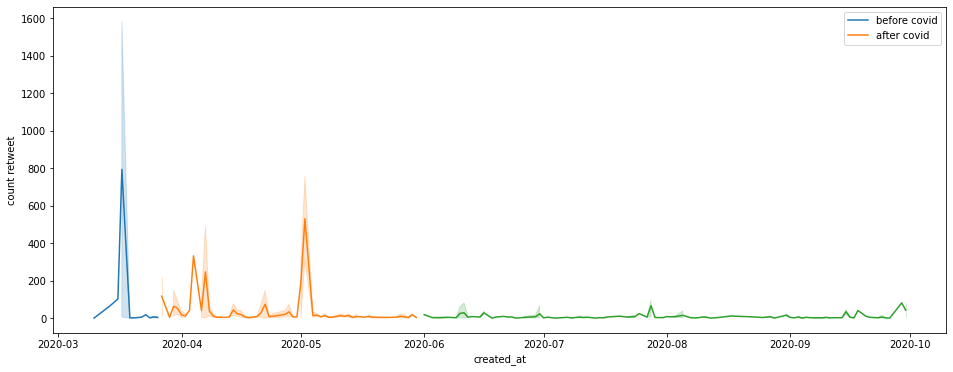

In [41]:
retweet_count(before_ld_Johannesburg,during_ld_Johannesburg,after_ld_Johannesburg)


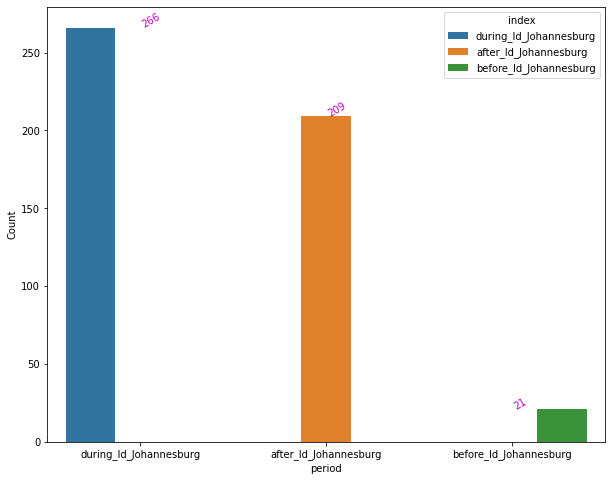

In [42]:
count_plot(datas)

# Lagos

In [43]:
after_ld_Lagos = pd.read_csv("legos/data_after_lockdown_L.csv",parse_dates=['created_at'])
before_ld_Lagos = pd.read_csv("legos/data_before_lockdown_L.csv",parse_dates=['created_at'])
during_ld_Lagos = pd.read_csv("legos/data_during_lockdown_L.csv",parse_dates=['created_at'])

In [44]:
datas = [before_ld_Lagos,after_ld_Lagos,during_ld_Lagos]

In [45]:
to_date(datas)

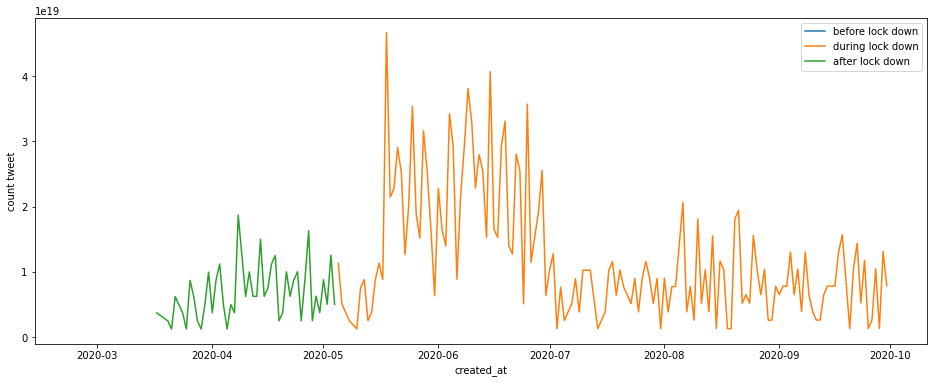

In [49]:
lockdown_analysis(before_ld_Lagos,after_ld_Lagos,during_ld_Lagos)

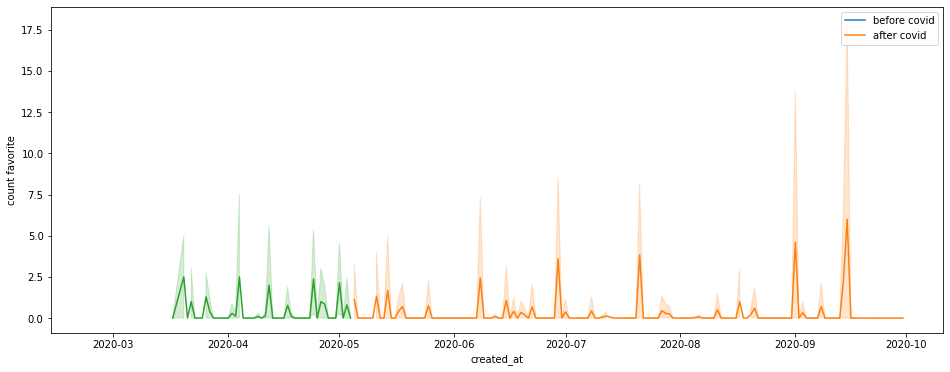

In [46]:
favorite_count(before_ld_Lagos,after_ld_Lagos,during_ld_Lagos)


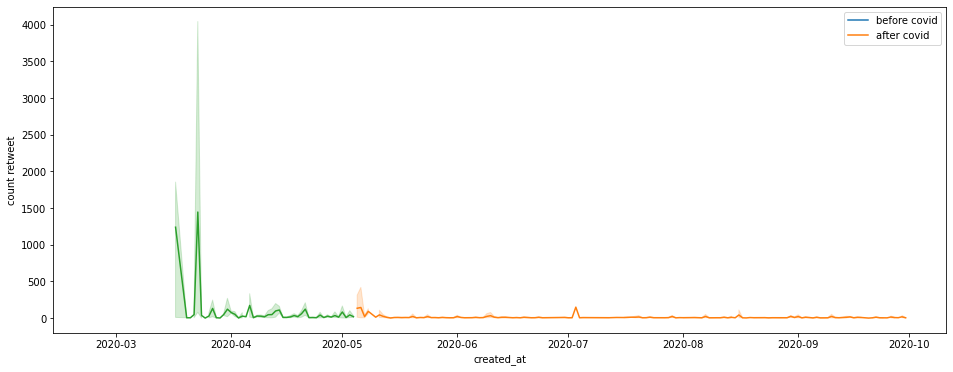

In [47]:
retweet_count(before_ld_Lagos,after_ld_Lagos,during_ld_Lagos)


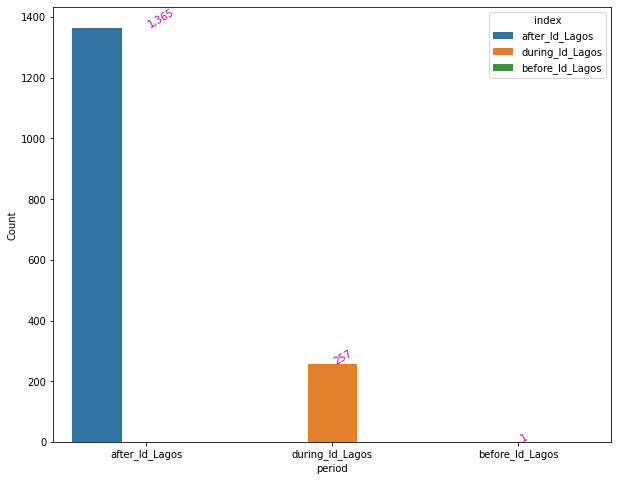

In [48]:
count_plot(datas)